# Import libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
%load_ext tensorboard
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Lab 1: Nonsaturating Activation Functions
## Leaky ReLU
### Using Leaky ReLU

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train,y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 510us/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7158

## ELU

In [17]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 510us/step - loss: 1.4658 - accuracy: 0.5332 - val_loss: 0.7927 - val_accuracy: 0.7376

## SELU

In [19]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 512us/step - loss: 1.3190 - accuracy: 0.5853 - val_loss: 0.7056 - val_accuracy: 0.7710

# Lab 2: BATCH NORMALIZATION
## Build a model using batch normal layers

In [21]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

## Compile and train the model

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 884us/step - loss: 1.1207 - accuracy: 0.6292 - val_loss: 0.5540 - val_accuracy: 0.8156

# Lab 3: Faster Optimizers

## Momentum optimization

In [24]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## Nesterov Accelerated Gradient

In [25]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [26]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [27]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization

In [28]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [29]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [30]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Try some optimizers

In [31]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## Momentum optimization

In [32]:
# Momentum optimization
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [40]:
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 1s 625us/step - loss: 0.6267 - accuracy: 0.7783 - val_loss: 0.7735 - val_accuracy: 0.7752 - ETA: 0s - loss: 0.7646 - accuracy: 0.7289

## Adam Optimization

In [ ]:
# Adam Optimization
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentorpy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid, y_valid))

# Lab 4: Learning Rate Scheduling

## Power Scheduling

* lr = lr0 / (1 + steps / s)**c
* keras uses c=1 and s = 1 / decay

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)
# decay is the inverse of s (the number og steps it
# take to divide the lr by one more unit)

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [36]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 1s 621us/step - loss: 0.6270 - accuracy: 0.7811 - val_loss: 0.7528 - val_accuracy: 0.7824

## Power Scheduling (Plot func. is provided)

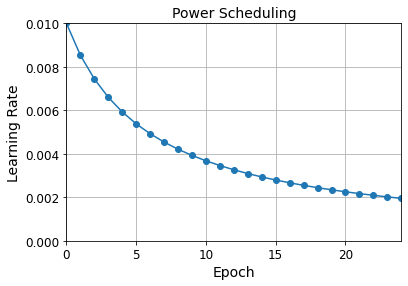

In [37]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling

* lr = lr0 * 0.1**(epoch / s)

In [46]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [51]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

n_epochs=25

In [52]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 43s 25ms/step - loss: 2.7072 - accuracy: 0.6745 - val_loss: 30.6974 - val_accuracy: 0.1938

KeyboardInterrupt: 

## Exponential Scheduling (Plot fnc. is provided)

In [53]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

KeyError: 'lr'

## Piecewise Constant Scheduling

In [54]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

n_epochs=25

In [58]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

Epoch 1/25
 442/1719 [======>.......................] - ETA: 10s - loss: 2.5765 - accuracy: 0.6300  

KeyboardInterrupt: 

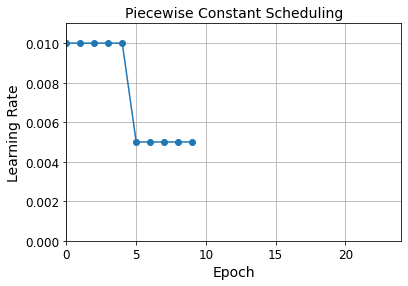

In [59]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# LAB 5: REGULARIZATION
## L1 and L2 regularization

In [60]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or L1(0.1) for l1 regularization with a factor or 0.1
# or L1_L2(0.1, 0.01) for both l1 and l2 regularization, with factors 0.1 and 0/01 respectively

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.1))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs=10
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid, y_valid))

Epoch 1/10
 319/1719 [====>.........................] - ETA: 9s - loss: 8.6403 - accuracy: 0.6419        

KeyboardInterrupt: 

## Create multiple layers with the same setting

In [64]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs=10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
 291/1719 [====>.........................] - ETA: 9s - loss: 11.8793 - accuracy: 0.1323   

KeyboardInterrupt: 

## Dropout

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs=10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
 295/1719 [====>.........................] - ETA: 9s - loss: 3.3533 - accuracy: 0.1084       

KeyboardInterrupt: 

# 연습문제

## Question 1
Train a deep model on MNIST fashion dataset with different learning rate: lr = 1e-2, 1e-4, and 1e-6.

1) **Model architecture (모델 구조)**
 * Input layer (Flatten)
 * Dense layer (size = 300), relu, he_normal
 * Dense layer (size = 100), relu, he_normal
 * Output layer

2) Use Adam optimization and train the network on the MNIST fashion dataset for 20 epochs.

3) Tensorboard setup code is provided.

4) Compare the learning curves in tensorboard and give your comments.


### 1. 데이터 로드
### 1.1 패션 MNIST 데이터 로드

### 1.2 기본적인 전처리하시오.
* 이미지 값을 0-255 사이 값을 0-1 사이 값으로 바꾸어 정규화시킵니다.
* 학습 데이터를 인덱스 50000 기준으로 train과 vaild로 분할합니다.
* 학습 데이터셋의 평균과 표준편차를 구해 표준화(StandardScale)를 시킵니다.

### 2. 모델 빌드
* 단, np.random.seed(42)와 tf.random_set_seed(42)를 반드시 고정시킵니다.

#### **... 부분에 들어갈 코드를 작성하시오.**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n_epochs = 20

for lr in [...]:
    tf.keras.backend.clear_session()
    
    run_logdir = os.path.join(os.curdir, "my_logs", "Q1_lr_"+ str(lr))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

    optimizer = keras.optimizers.Adam(lr=lr)
    
    #complete your model

    model = ...

    model.compile(...) 

    model.fit(X_train_scaled, y_train, epochs=n_epochs,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=tensorboard_cb)

### 3. 텐서보드 실행하시오.

In [ ]:
%tensorboard --logdir=./my_logs --port=6006

## Question 2
Train a deep model on MNIST fashion dataset with different learning rate: lr = 1e-2, 1e-4, and 1e-6.

1) **Model architecture (모델 구조)**
 * Input layer
 * Dense layer (size = 300), relu, he_normal
 * Batch normalize
 * Dense layer (size = 100), relu, he_normal
 * Output layer


2) Use Adam optimization and train the network on the MNIST fashion dataset for 20 epochs.

3) Tensorboard setup code is provided.

4) Compare the learning curves in tensorboard and give your comments.

### 1. ... 부분 코드 작성하시오.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n_epochs = 20

for lr in [...]:
    tf.keras.backend.clear_session()
    
    run_logdir = os.path.join(os.curdir, "my_logs", "Q2_lr_"+ str(lr))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

    optimizer = keras.optimizers.Adam(lr=lr)
    
    #complete your model

    model = ...

    model.compile(...) 

    model.fit(X_train_scaled, y_train, epochs=n_epochs,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=tensorboard_cb)

### 2. 텐서보드 실행하시오.

In [ ]:
%tensorboard --logdir=./my_logs --port=6006

## Question 3
Train a deep model on MNIST fashion dataset with different dropout rate: 0.1, 0.5, and 0.9


1) **Model architecture (모델 구조)**
 * Input layer
 * Dense layer (size = 300), relu, he_normal
 * Batch normalize
 * Dense layer (size = 100), relu, he_normal
 * Dropout 
 * Output layer


2) Use Adam optimization (learning rate = 0.01) and train the network on the MNIST fashion dataset for 20 epochs.

3) Tensorboard setup code is provided.

4) Compare the learning curves in tensorboard and give your comments.

### 1. ... 부분 코드 작성하시오.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

n_epochs = 20

for dropout_rate in [...]:
    tf.keras.backend.clear_session()
    
    run_logdir = os.path.join(os.curdir, "my_logs", "Q3_dropout_rate_"+ str(dropout_rate))
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

    optimizer = ...
    
    #complete your model

    model = ...

    model.compile(...) 

    model.fit(X_train_scaled, y_train, epochs=n_epochs,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=tensorboard_cb)

### 2. 텐서보드 실행하시오.

In [ ]:
%tensorboard --logdir=./my_logs --port=6006